In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Functions_IPM import run_year_i, run_year_f, run_year_n
from Functions_base import t_growing, G, T87, Temerge, T61, ic_base
from Functions_analysis import Y
from Functions_plotting import plot_one_farm_type, c2, c3, c4, plot_one_intervention
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
c = ['#FAF5E8','#DACAA0','#B59441','#887D3D','#5A6638','#2D331C']
my_cmap = mpl.colors.LinearSegmentedColormap.from_list("my_cmap",c)

# Investigate the optimal ascospore management regime in the cross-field scenario

/home/evincent/Documents/IPM/Code/Paper1_for_github/Functions_IPM.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  FOI = r_beta*beta*(I + P)/A


[11 11 10 10  9  9  8  7  6  5]


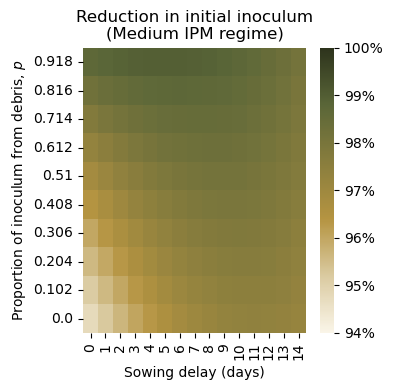

In [2]:
# Optimise sowing date in the medium scenario
r_beta = 0.985
biocontrol_dates = [31]
debris_removal = 0.154
prop_debris = np.round(np.arange(0,0.918+0.102,0.102),3)

Ndays = 14+1
all_YI = np.zeros((Ndays,len(prop_debris)))

for i in range(len(prop_debris)):
    for j in range(Ndays):
        sow_delay = j
        ic = 1*ic_base
        pop_i = run_year_i(ic,r_beta,sow_delay,prop_debris[i],debris_removal,biocontrol_dates)

        # Compute yields
        all_YI[j,i] = Y(pop_i)
        
fig,ax = plt.subplots(1,figsize = (4,4))
sns.heatmap(all_YI.T,ax=ax,vmin=0.94,vmax=1,cmap=my_cmap,cbar_kws={'format': FuncFormatter(lambda x,pos:'{:.0%}'.format(x))})
ax.invert_yaxis()
ax.set_xticks(ticks = np.arange(Ndays)+0.5,labels=range(Ndays))
ax.set_xlabel("Sowing delay (days)")
ax.set_yticks(ticks = np.arange(len(prop_debris))+0.5,labels=prop_debris,rotation=0)
ax.set_ylabel(r"Proportion of inoculum from debris, $p$")
ax.set_title("Reduction in initial inoculum\n(Medium IPM regime)")
plt.tight_layout()

fig.savefig('Figures/Manuscript_final/fig_optimalsowingdatemed.pdf', dpi=400)

print(np.argmax(all_YI,axis=0))

/home/evincent/Documents/IPM/Code/Paper1_for_github/Functions_IPM.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  FOI = r_beta*beta*(I + P)/A


[9 9 8 8 7 6 5 3]


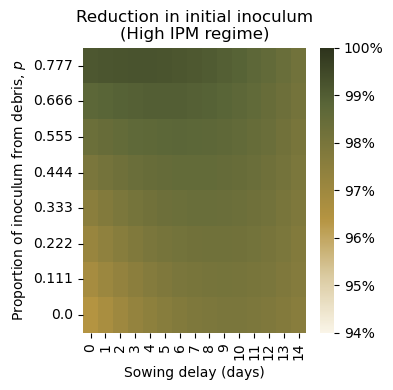

In [3]:
# Optimise sowing date in the high scenario
r_beta = 0.972
biocontrol_dates = [31,39]
debris_removal = 0

prop_debris = np.arange(0,0.777+0.111,0.111)

Ndays = 14+1
all_YI = np.zeros((Ndays,len(prop_debris)))

for i in range(len(prop_debris)):
    for j in range(Ndays):
        sow_delay = j
        ic = 1*ic_base
        pop_i = run_year_i(ic,r_beta,sow_delay,prop_debris[i],debris_removal,biocontrol_dates)

        # Compute yields
        all_YI[j,i] = Y(pop_i)
fig,ax = plt.subplots(1,figsize = (4,4))
sns.heatmap(all_YI.T,ax=ax,vmin=0.94,vmax=1,cmap=my_cmap,cbar_kws={'format': FuncFormatter(lambda x,pos:'{:.0%}'.format(x))})
ax.set_xticks(ticks = np.arange(Ndays)+0.5,labels=range(Ndays))
ax.invert_yaxis()
ax.set_xlabel("Sowing delay (days)")
ax.set_yticks(ticks = np.arange(len(prop_debris))+0.5,labels=prop_debris,rotation=0)
ax.set_ylabel(r"Proportion of inoculum from debris, $p$")
ax.set_title("Reduction in initial inoculum\n(High IPM regime)")
plt.tight_layout()

fig.savefig('Figures/Manuscript_final/fig_optimalsowingdatehigh.pdf', dpi=400)


print(np.argmax(all_YI,axis=0))

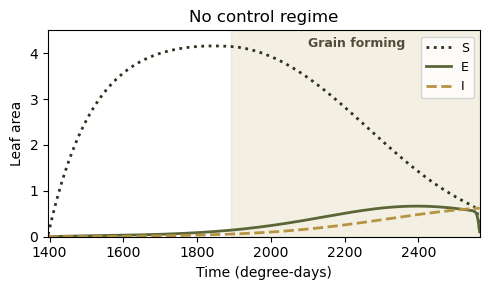

In [4]:
# Plot no control
pop_n = run_year_n(ic_base)
fig,ax = plot_one_farm_type(pop_n, 'n')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_nocontrolregime.pdf', dpi=400)

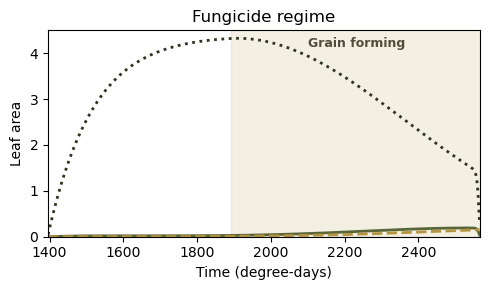

In [5]:
# Plot fungicide
pop_f = run_year_f(ic_base)
fig,ax = plot_one_farm_type(pop_f, 'f')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_fungicideregime.pdf', dpi=400)

/home/evincent/Documents/IPM/Code/Paper1_for_github/Functions_IPM.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  FOI = r_beta*beta*(I + P)/A


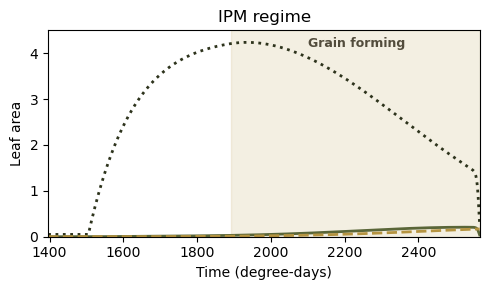

In [6]:
# Plot IPM
# IPM parameters
r_beta = 0.985
sow_delay = 7
prop_debris = 0.1
debris_removal = 0.154
biocontrol_dates = [31]
pop_i = run_year_i(ic_base,r_beta,sow_delay,prop_debris,debris_removal,biocontrol_dates)
fig,ax = plot_one_farm_type(pop_i, 'i')
plt.tight_layout()
fig.savefig('Figures/Manuscript_final/fig_ipmregime.pdf', dpi=400)

In [7]:
# IPM low
r_beta = 0.998
sow_delay = 0
prop_debris = 0
debris_removal = 0.154
biocontrol_dates = [39]
pop_ilow = run_year_i(ic_base,r_beta,sow_delay,prop_debris,debris_removal,biocontrol_dates)

# IPM high
r_beta = 0.972
sow_delay = 3
prop_debris = 0.777
debris_removal = 0
biocontrol_dates = [31,39]
pop_ihigh = run_year_i(ic_base,r_beta,sow_delay,prop_debris,debris_removal,biocontrol_dates)

/home/evincent/Documents/IPM/Code/Paper1_for_github/Functions_IPM.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  FOI = r_beta*beta*(I + P)/A


Yields
[0.9254997780858897, 0.9723632148254476, 0.9923589962306695]
Peak percent infection
[0.11053546902848577, 0.03807788412379184, 0.01030846630148642]


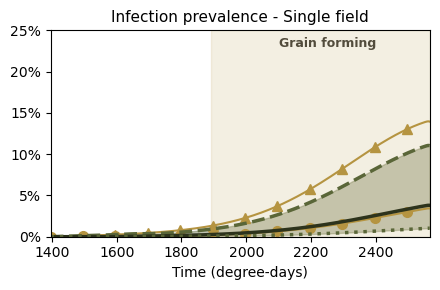

In [8]:
# Plot infection prevalence and yield figures
fig1,ax1 = plot_one_intervention([pop_ilow,pop_i,pop_ihigh],["","",""],"Single field")
ax1.get_legend().remove()
fig1.set_tight_layout(True)
# Save figures
fig1.savefig('Figures/Manuscript_final/fig_singlefarminfection.pdf', dpi=400)

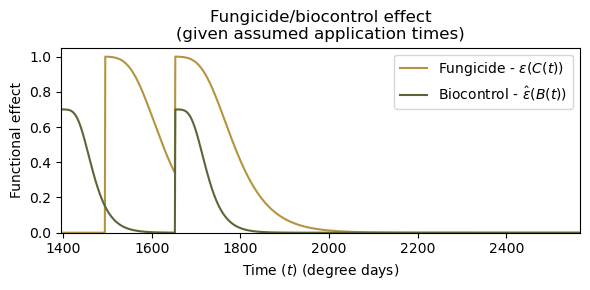

In [9]:
# Plot fungicide and biocontrol for SI figures
from Functions_IPM import eps, biocontrol
from Functions_base import omega_base, theta_base, delta_base
omega_i, theta_i, delta_i = np.load("biocontrol_fit_results.npy")

fig,ax = plt.subplots(1,figsize = (6,3))

# Fungicide
F = [eps(t_growing[i], omega_base, theta_base, delta_base) for i in range(len(t_growing))]
ax.plot(t_growing, F,label = r"Fungicide - $\epsilon(C(t))$",c=c2)

# Biocontrol
B = [biocontrol([31,39])(t_growing[i],0) for i in range(len(t_growing))]
ax.plot(t_growing, B,label=r"Biocontrol - $\hat\epsilon(B(t))$",c=c4)

ax.legend(loc = "upper right")
ax.set_xlim([t_growing[0],t_growing[-1]])
ax.set_ylim([0,1.05])
ax.set_xlabel(r"Time ($t$) (degree days)")
ax.set_ylabel("Functional effect")

ax.set_title("Fungicide/biocontrol effect\n(given assumed application times)")
plt.tight_layout()


fig.savefig('Figures/Manuscript_final/fig_fungicidevbiocontrol.pdf', dpi=400)